In [18]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt

nasdaq = pd.read_excel('Data/nasdaq.xlsx').reset_index(drop=True)
nasdaq = pd.DataFrame(nasdaq["PX_LAST"].values, nasdaq["date"], columns = ["price"])

data = pd.read_excel('Data/IPOs.xlsx').reset_index(drop=True)
for i in range(len(data)):
    data["Symbol"][i] = data["Symbol"][i] + " US Equity"
data.set_index('Symbol',inplace=True)
del data['IPO_FLOAT_MKT_CAP']
del data['PREVIOUS_TRADING_DATE']
del data['Cur_MKT_CAP']
data['IPO price'] = 0.
data['Volatility 6 months (%)'] = 0.
data['Volatility 0-3 months (%)'] = 0.
data['Volatility 3-6 months (%)'] = 0.
data['1 week low/high'] = [(0., 0.)]*len(data)
data['1 month low/high'] = [(0., 0.)]*len(data)
data['3 month low/high'] = [(0., 0.)]*len(data)
data['6 months low/high'] = [(0., 0.)]*len(data)
data['Variation high/low (%)'] = 0.
data['Variation IPO/low (%)'] = 0.
data['Variation IPO/high (%)'] = 0.
data['6 months price above IPO'] = str()

C:\Users\JohnSibony\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [19]:
data_price = pd.read_excel('Data/IPOs_price.xlsx').reset_index(drop=True)
data_price = data_price.drop(0)
data_price = data_price.rename(columns={'Tickers': 'Dates'})
data_price = data_price.set_index('Dates', drop=True)

ipo_price = {}
nasdaq_price_ipo = {}
for ticker in data_price.columns:
    selec = data_price[ticker].dropna()
    
    ipo_date = selec.index[0]
    nasdaq_ipo = nasdaq.loc[ipo_date:]["price"][0:126]
    nasdaq_price_ipo[ticker] = list(nasdaq_ipo.values)
    nasdaq_date = nasdaq_ipo.index
    selec = list(selec[nasdaq_ipo.index].values)
    ipo_price[ticker] = selec
 
    data.at[ticker,"Market Cap (base 1M)"] = float(data.at[ticker,"Market Cap (base 1M)"])
    data.at[ticker,"1 week low/high"] = [round(min(selec[0:5]),1), round(max(selec[0:5]),1)]
    data.at[ticker,"1 month low/high"] = [round(min(selec[0:21]),1), round(max(selec[0:21]),1)]
    data.at[ticker,"3 month low/high"] = [round(min(selec[0:21*3]),1), round(max(selec[0:21*3]),1)]
    low_index, high_index = selec.index(min(selec)), selec.index(max(selec))
    data.at[ticker,'6 months low/high'] = [round(selec[low_index],1), round(selec[high_index],1)]
    data.at[ticker,'IPO price'] = round(selec[0],1)
    log_return = np.array([(np.log(selec[j]) - np.log(selec[j-1])) for j in range(1, len(selec))])
    data.at[ticker,"Volatility 6 months (%)"] = round(float(100*np.sqrt(252) * log_return.std()),1)
    data.at[ticker,'Volatility 0-3 months (%)'] = round(float(100*np.sqrt(252) * log_return[0:int(len(log_return)/2)].std()),1)
    data.at[ticker,'Volatility 3-6 months (%)'] = round(float(100*np.sqrt(252) * log_return[int(len(log_return)/2):].std()),1)
    if(selec[-1]>data.loc[ticker]['IPO price']):
        data.at[ticker,'6 months price above IPO'] = "YES"
    else:
        data.at[ticker,'6 months price above IPO'] = "NO"
    
    if(low_index<high_index):
        data.at[ticker,'Variation high/low (%)'] = round(100*((data.loc[ticker]['6 months low/high'][1] /data.loc[ticker]['6 months low/high'][0])-1),1)
    else:
        data.at[ticker,'Variation high/low (%)'] = round(100*((data.loc[ticker]['6 months low/high'][0] /data.loc[ticker]['6 months low/high'][1])-1),1)
    data.at[ticker,'Variation IPO/low (%)'] = round(100*((data.loc[ticker]['6 months low/high'][0] /selec[0])-1),1)
    data.at[ticker,'Variation IPO/high (%)'] = round(100*((data.loc[ticker]['6 months low/high'][1] /selec[0])-1),1)
    
data = data.drop(index=['T US Equity', 'CTK US Equity', '1317355D US Equity', 'LNKD US Equity'])

In [20]:
large_cap_tickers = ["BABA US Equity", "ATHM US Equity", 'DBX US Equity', 'FB US Equity', 'GDDY US Equity', 'NFLX US Equity','PANW US Equity','PYPL US Equity', 'CRM US Equity', 'NOW US Equity','SNAP US Equity','SPLK US Equity','SPOT US Equity','TSLA US Equity','TWTR US Equity','V US Equity','WDAY US Equity']
large_cap_data = data.loc[large_cap_tickers]
large_cap_data = large_cap_data.loc[list(large_cap_data["Variation IPO/low (%)"].sort_values(ascending=False).index)]
large_cap_data.loc["LYFT US EQUITY"] = ["Lyft", "Communications", "29/03/2019", '16938,0', 72.0, "NaN", "80.5", "NaN", [69.0, 78.3], [56.1, 78.3], [48.1, 78.3], "NaN", "NaN", "NaN", "NaN", "NaN"] 
large_cap_data

,Company,Industry,Offer Date,Market Cap (base 1M),IPO price,Volatility 6 months (%),Volatility 0-3 months (%),Volatility 3-6 months (%),1 week low/high,1 month low/high,3 month low/high,6 months low/high,Variation high/low (%),Variation IPO/low (%),Variation IPO/high (%),6 months price above IPO
Symbol,,,,,,,,,,,,,,,,
WDAY US Equity,WorkDay,Technology,2012-10-12 00:00:00,47418,28.0,86.1,117.1,33.8,"[28, 55.4]","[28, 55.4]","[28, 56.2]","[28, 64.5]",130.4,0,130.4,YES
NOW US Equity,Service Now,Technology,2012-06-29 00:00:00,50644,18.0,69.2,81.2,51.7,"[18, 26.0]","[18, 26.0]","[18, 40.4]","[18, 40.4]",124.4,0,124.4,YES
ATHM US Equity,Autohome Inc,Communications,2013-12-11 00:00:00,11767,17.0,112.9,139.4,75.7,"[17, 30.1]","[17, 36.6]","[17, 51.8]","[17, 51.8]",204.7,0,204.7,YES
DBX US Equity,Dropbox,Technology,2018-03-23 00:00:00,10794,21.0,70,82.8,51.8,"[21, 31.0]","[21, 33.3]","[21, 42]","[21, 42]",100,0,100,YES
GDDY US Equity,GoDaddy,Communications,2015-04-01 00:00:00,13284,20.0,53.3,63.6,39.8,"[20, 26.5]","[20, 26.5]","[20, 31.8]","[20, 31.8]",59,0,59,YES
PANW US Equity,Palo Alto,Communications,2012-07-20 00:00:00,21274,42.0,57.8,70.1,40.9,"[42, 59.0]","[42, 66.5]","[42, 71.8]","[42, 71.8]",71,0,71,YES
V US Equity,Visa,Financial,2008-03-19 00:00:00,327535,11.0,59.7,69.7,45.5,"[11, 16.1]","[11, 17.0]","[11, 22.1]","[11, 22.1]",100.9,0,100.9,YES
BABA US Equity,Alibaba,Communications,2014-09-19 00:00:00,438427,68.0,57.5,73.4,33.5,"[68, 93.9]","[68, 93.9]","[68, 119.2]","[68, 119.2]",75.3,0,75.3,YES
SPLK US Equity,Splunk,Technology,2012-04-19 00:00:00,20496,17.0,118.7,162.5,43.9,"[17, 36.2]","[17, 36.2]","[17, 36.4]","[17, 39.1]",130,0,130,YES


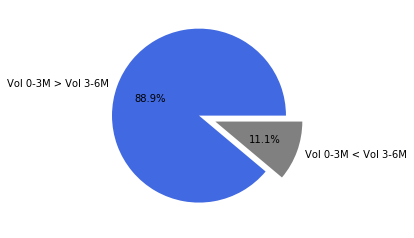

In [21]:
vol = sum(large_cap_data["Volatility 0-3 months (%)"]>large_cap_data["Volatility 3-6 months (%)"])/len(large_cap_data)
plt.pie([vol, 1-vol], explode = (0.1, 0.1), labels=["Vol 0-3M > Vol 3-6M", "Vol 0-3M < Vol 3-6M"], colors=['royalblue', 'grey'], autopct='%1.1f%%', startangle=0)
#plt.savefig('Presentation/Image/vol_period.png')
plt.show()

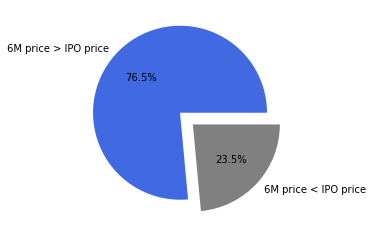

In [22]:
perf_positive = []
perf_negative = []
for ticker in large_cap_tickers:
    if(ipo_price[ticker][-1]>data.loc[ticker]['IPO price']):
        perf_positive.append(ticker)
    else:
        perf_negative.append(ticker)
pos = len(perf_positive) / len(large_cap_tickers)
plt.pie([pos, 1-pos], explode = (0.1, 0.1), labels=["6M price > IPO price", "6M price < IPO price"], colors=['royalblue', 'grey'], autopct='%1.1f%%', startangle=0)
#plt.savefig('Presentation/Image/6months_perf.png')
plt.show()

In [23]:
def mean_date_extremum(ticker_list):
    date_low = []
    date_high = []
    for ticker in ticker_list:
        low = data.loc[ticker]['6 months low/high'][0]
        high = data.loc[ticker]['6 months low/high'][1]
        price = [round(p, 1) for p in ipo_price[ticker]]
        date_low.append(price.index(low))
        date_high.append(price.index(high))
    return date_low, date_high

In [24]:
day_pos_low, day_pos_high = mean_date_extremum(perf_positive)
day_neg_low, day_neg_high = mean_date_extremum(perf_negative)
info_perf = pd.DataFrame([[np.mean(day_pos_low), np.mean(day_neg_low)], [np.mean(data.loc[perf_positive]['Variation IPO/low (%)']), np.mean(data.loc[perf_negative]['Variation IPO/low (%)'])], [np.mean(day_pos_high), np.mean(day_neg_high)], [np.mean(data.loc[perf_positive]['Variation IPO/high (%)']), np.mean(data.loc[perf_negative]['Variation IPO/high (%)'])]], index=['mean day low', 'mean variation IPO/low (%)', 'mean day high', 'mean variation IPO/high (%)'], columns=["6 months positive perf", '6 months negative perf'])
#info_perf.to_excel('Presentation/Image/info_perf.xlsx')
info_perf

,6 months positive perf,6 months negative perf
mean day low,3.307692,86.000
mean variation IPO/low (%),-1.523077,-40.825
mean day high,65.769231,10.750
mean variation IPO/high (%),110.392308,22.900


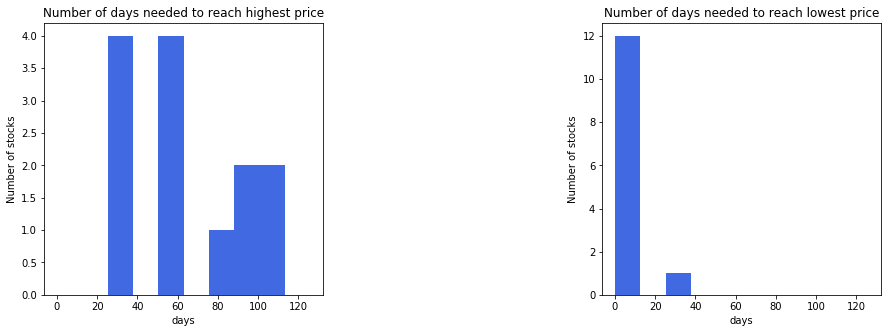

In [25]:
fig = plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.hist(day_pos_high, color=['royalblue'], range=[0, 126])
plt.title('Number of days needed to reach highest price')
plt.xlabel('days')
plt.ylabel('Number of stocks')
plt.subplot(1, 2, 2)
plt.hist(day_pos_low, color=['royalblue'], range=[0, 126])
plt.title('Number of days needed to reach lowest price')
plt.xlabel('days')
plt.ylabel('Number of stocks')
fig.subplots_adjust(hspace=0, wspace=1)
#plt.savefig('Presentation/Image/histogramme_days_positive.png')
plt.show()

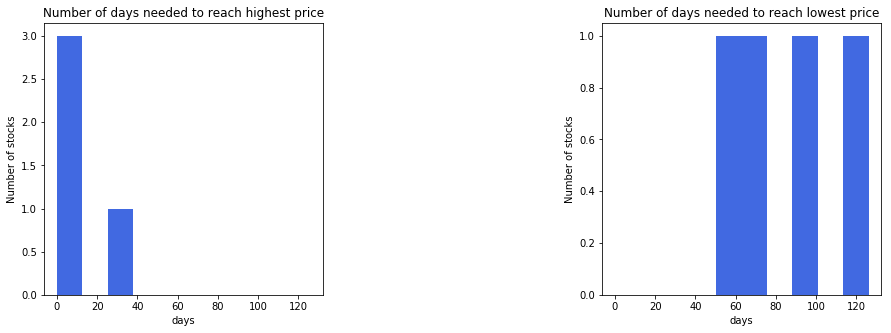

In [26]:
fig = plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.hist(day_neg_high, color=['royalblue'], range=[0, 126])
plt.title('Number of days needed to reach highest price')
plt.xlabel('days')
plt.ylabel('Number of stocks')
plt.subplot(1, 2, 2)
plt.hist(day_neg_low, color=['royalblue'], range=[0, 126])
plt.title('Number of days needed to reach lowest price')
plt.xlabel('days')
plt.ylabel('Number of stocks')
fig.subplots_adjust(hspace=0, wspace=1)
#plt.savefig('Presentation/Image/histogramme_days_negative.png')
plt.show()

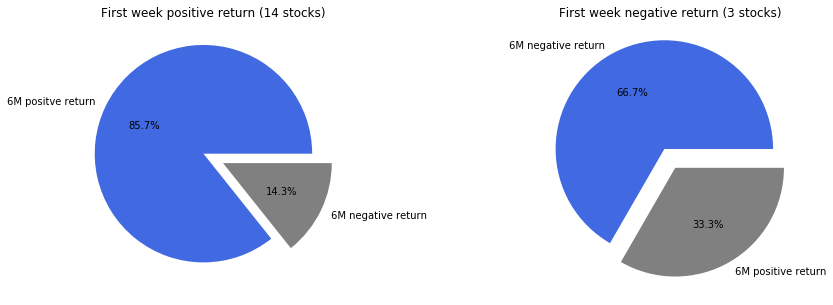

In [30]:
pos_week, neg_week = 0, 0
pos_week_pos_month, neg_week_neg_month = 0, 0
for ticker in large_cap_tickers:
    if(ipo_price[ticker][5]>ipo_price[ticker][0]):
        pos_week += 1
        if(ipo_price[ticker][-1]>ipo_price[ticker][0]):
            pos_week_pos_month += 1     
    else:
        neg_week += 1
        if(ipo_price[ticker][-1]<ipo_price[ticker][0]):
            neg_week_neg_month += 1 
fig = plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.pie([pos_week_pos_month/pos_week, 1-(pos_week_pos_month/pos_week)], explode = (0.1, 0.1), labels=["6M positve return", "6M negative return"], colors=['royalblue', 'grey'], autopct='%1.1f%%', startangle=0)
plt.title('First week positive return (14 stocks)')
plt.subplot(1, 2, 2)
plt.pie([neg_week_neg_month/neg_week, 1-(neg_week_neg_month/neg_week)], explode = (0.1, 0.1), labels=["6M negative return", "6M positive return"], colors=['royalblue', 'grey'], autopct='%1.1f%%', startangle=0)
plt.title('First week negative return (3 stocks)')
#plt.savefig('Presentation/Image/6months_1week.png')
plt.show()

In [11]:
def plot_ipo(large_cap_tickers, detrend=True):

    lift = pd.read_excel('Data/lyft_price.xlsx').reset_index(drop=True)
    lift = lift["Last Price"].tolist()[::-1]

    plt.figure(figsize=(20,15))
    for ticker in large_cap_tickers:
        price = ipo_price[ticker]
        nasdaq = nasdaq_price_ipo[ticker]
        return_price = [(price[index]/price[index-1])-1 for index in range(1,len(price))]
        return_nasdaq = [(nasdaq[index]/nasdaq[index-1])-1 for index in range(1,len(nasdaq))]
        price_100_basis = [100]*len(return_price)
        if(detrend):
            for i in range(1, len(return_price)):
                price_100_basis[i] = price_100_basis[i-1] * (1 + return_price[i-1] - return_nasdaq[i-1])
        else:
            for i in range(1, len(return_price)):
                price_100_basis[i] = price_100_basis[i-1] * (1 + return_price[i-1])
        plt.plot(price_100_basis, label=data.loc[ticker]["Company"])   
    return_price = [(lift[index]/lift[index-1])-1 for index in range(1,len(lift))]
    price_100_basis = [100]*len(return_price)
    for i in range(1, len(return_price)):
        price_100_basis[i] = price_100_basis[i-1] * (1 + return_price[i-1])  
    plt.plot(price_100_basis, label="Lift")
    plt.xlabel('Days')
    plt.legend(loc='upper left')
    return plt

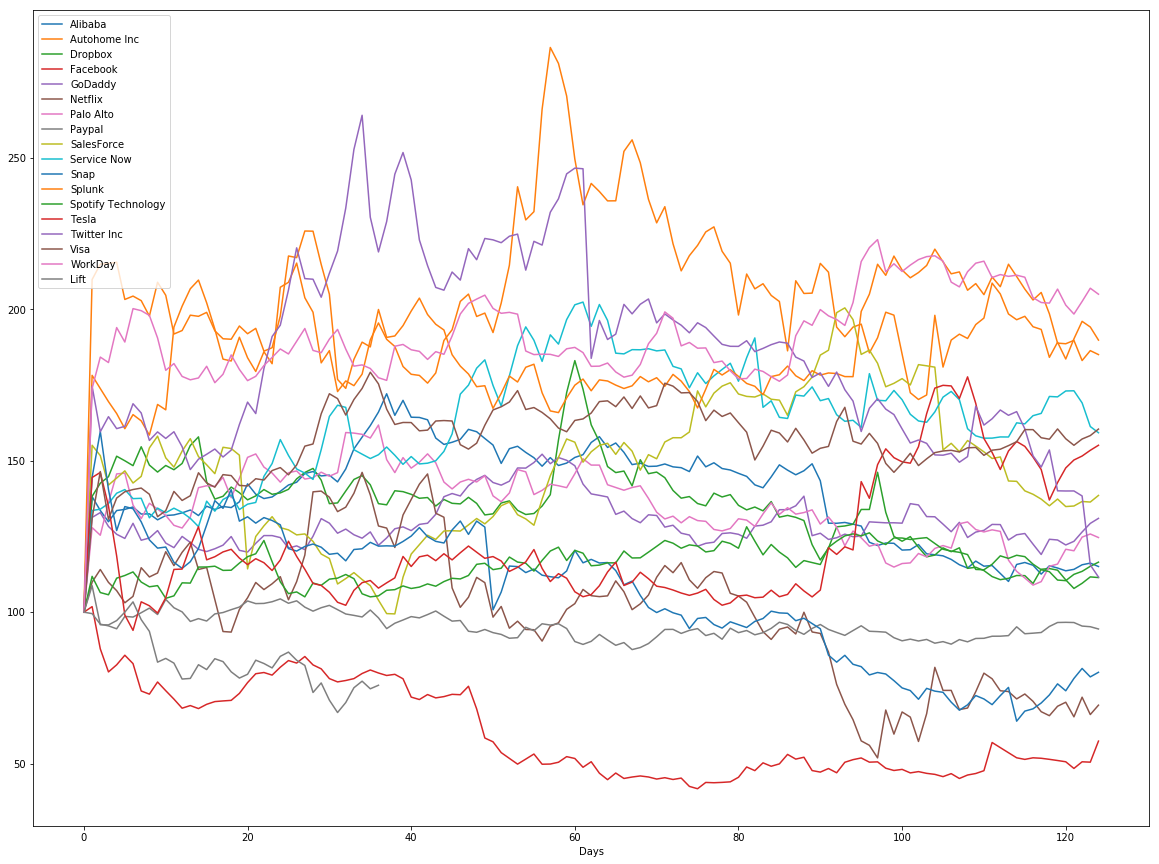

In [12]:
res = plot_ipo(large_cap_tickers)
#res.savefig('Presentation/Image/ipo_price_'+str(len(large_cap_tickers))+".png")
res.show()

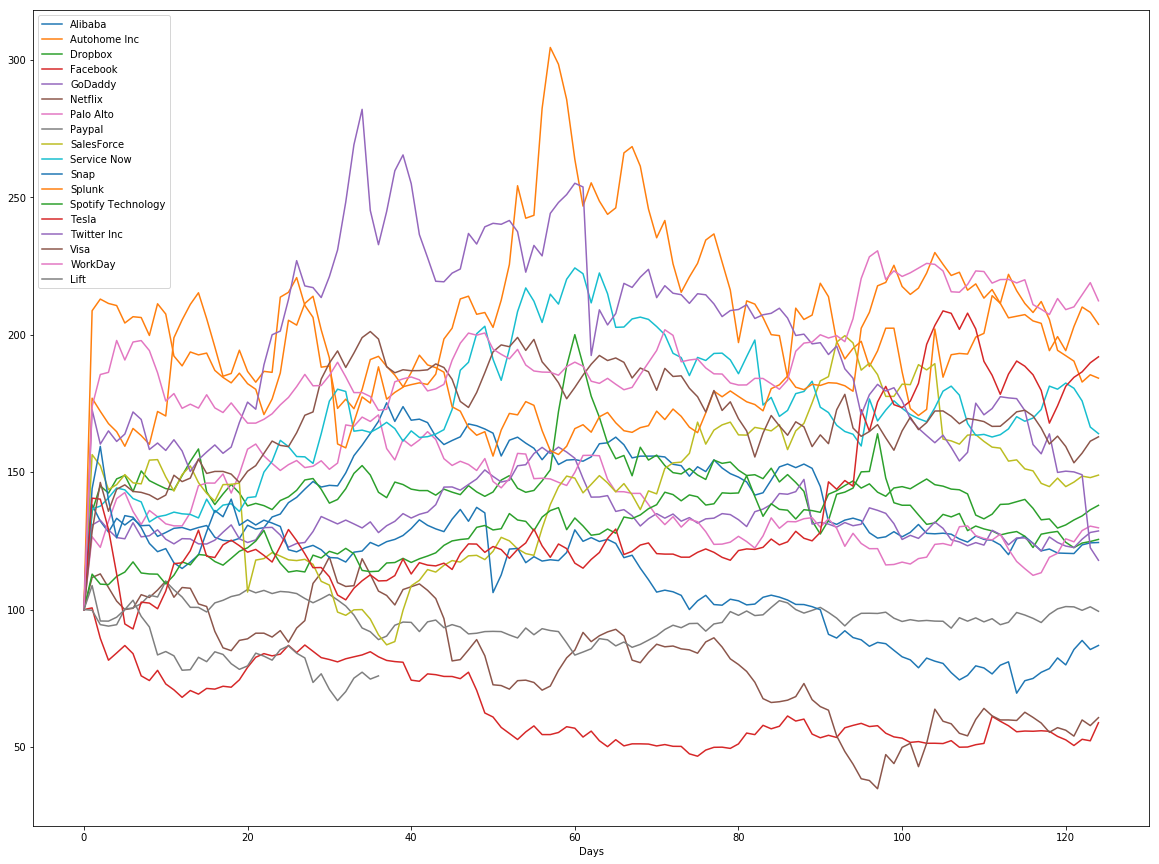

In [13]:
res = plot_ipo(large_cap_tickers, False)
#res.savefig('Presentation/Image/ipo_price_without_nasdaq_'+str(len(large_cap_tickers))+".png")
res.show()

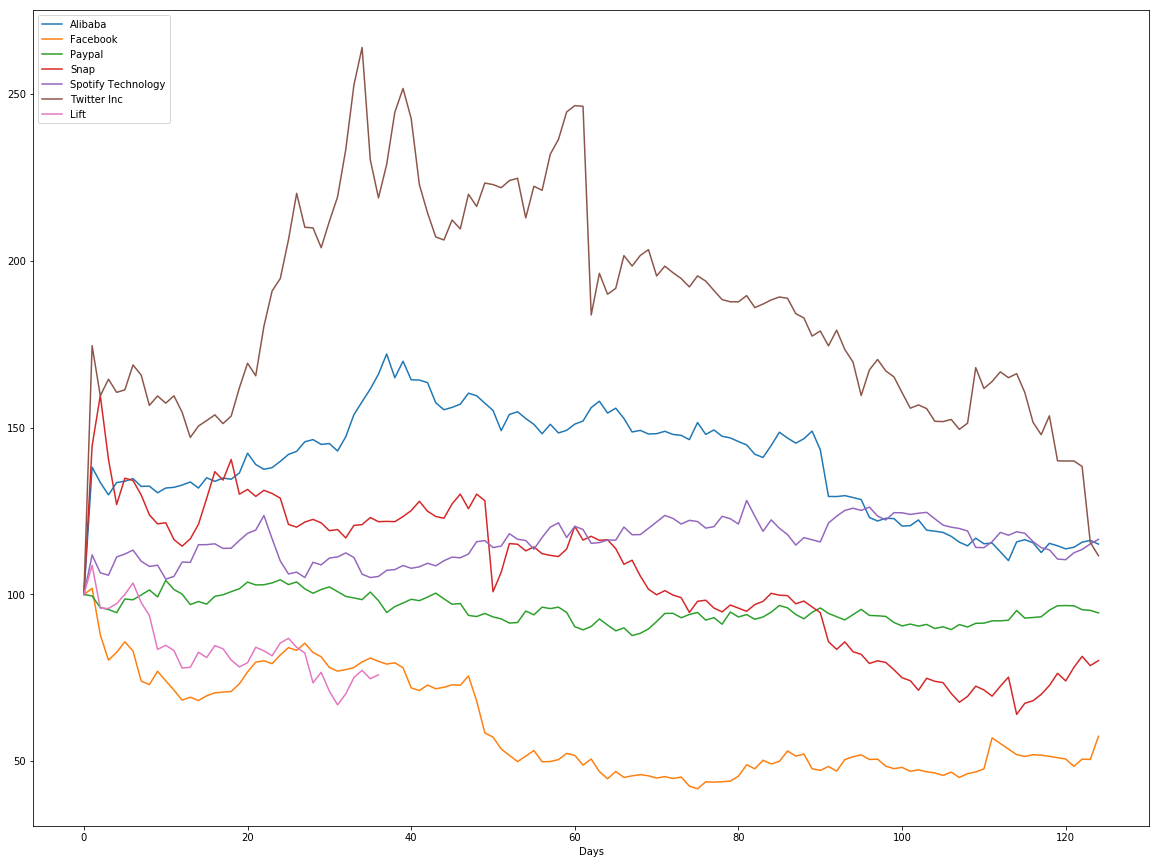

In [14]:
large_cap_tickers = ["BABA US Equity", 'FB US Equity', 'PYPL US Equity','SNAP US Equity','SPOT US Equity','TWTR US Equity']
large_cap_data = data.loc[large_cap_tickers]
res = plot_ipo(large_cap_tickers)
#res.savefig('Presentation/Image/ipo_price_'+str(len(large_cap_tickers))+".png")
res.show()

In [15]:
lift = pd.read_excel('Data/lyft_price.xlsx').reset_index(drop=True)
lift = lift["Last Price"].tolist()[::-1]


df_price = []
for ticker in large_cap_tickers:
    price = ipo_price[ticker]
    return_price = [(price[index]/price[index-1])-1 for index in range(1,len(price))][0:len(lift)]
    df_price.append(return_price)
df_price.append([(lift[index]/lift[index-1])-1 for index in range(1,len(lift))])
df_price = list(map(list, zip(*df_price)))
columns = large_cap_tickers
columns.append("LYFT US Equity")
d = pd.DataFrame(df_price, columns=columns)
d.corr()

,BABA US Equity,FB US Equity,PYPL US Equity,SNAP US Equity,SPOT US Equity,TWTR US Equity,LYFT US Equity
BABA US Equity,1.000000,0.159232,-0.048844,0.777559,0.623783,0.905937,0.399278
FB US Equity,0.159232,1.000000,0.049928,0.040720,0.142183,0.111120,0.296033
PYPL US Equity,-0.048844,0.049928,1.000000,-0.027741,0.066759,0.028686,0.174501
SNAP US Equity,0.777559,0.040720,-0.027741,1.000000,0.487260,0.766950,0.243994
SPOT US Equity,0.623783,0.142183,0.066759,0.487260,1.000000,0.610145,0.118684
TWTR US Equity,0.905937,0.111120,0.028686,0.766950,0.610145,1.000000,0.390888
LYFT US Equity,0.399278,0.296033,0.174501,0.243994,0.118684,0.390888,1.000000
